### logistic regression function

In [1]:
z=np.arange(-10,10,0.01)
g=1/(1+np.exp(-z))

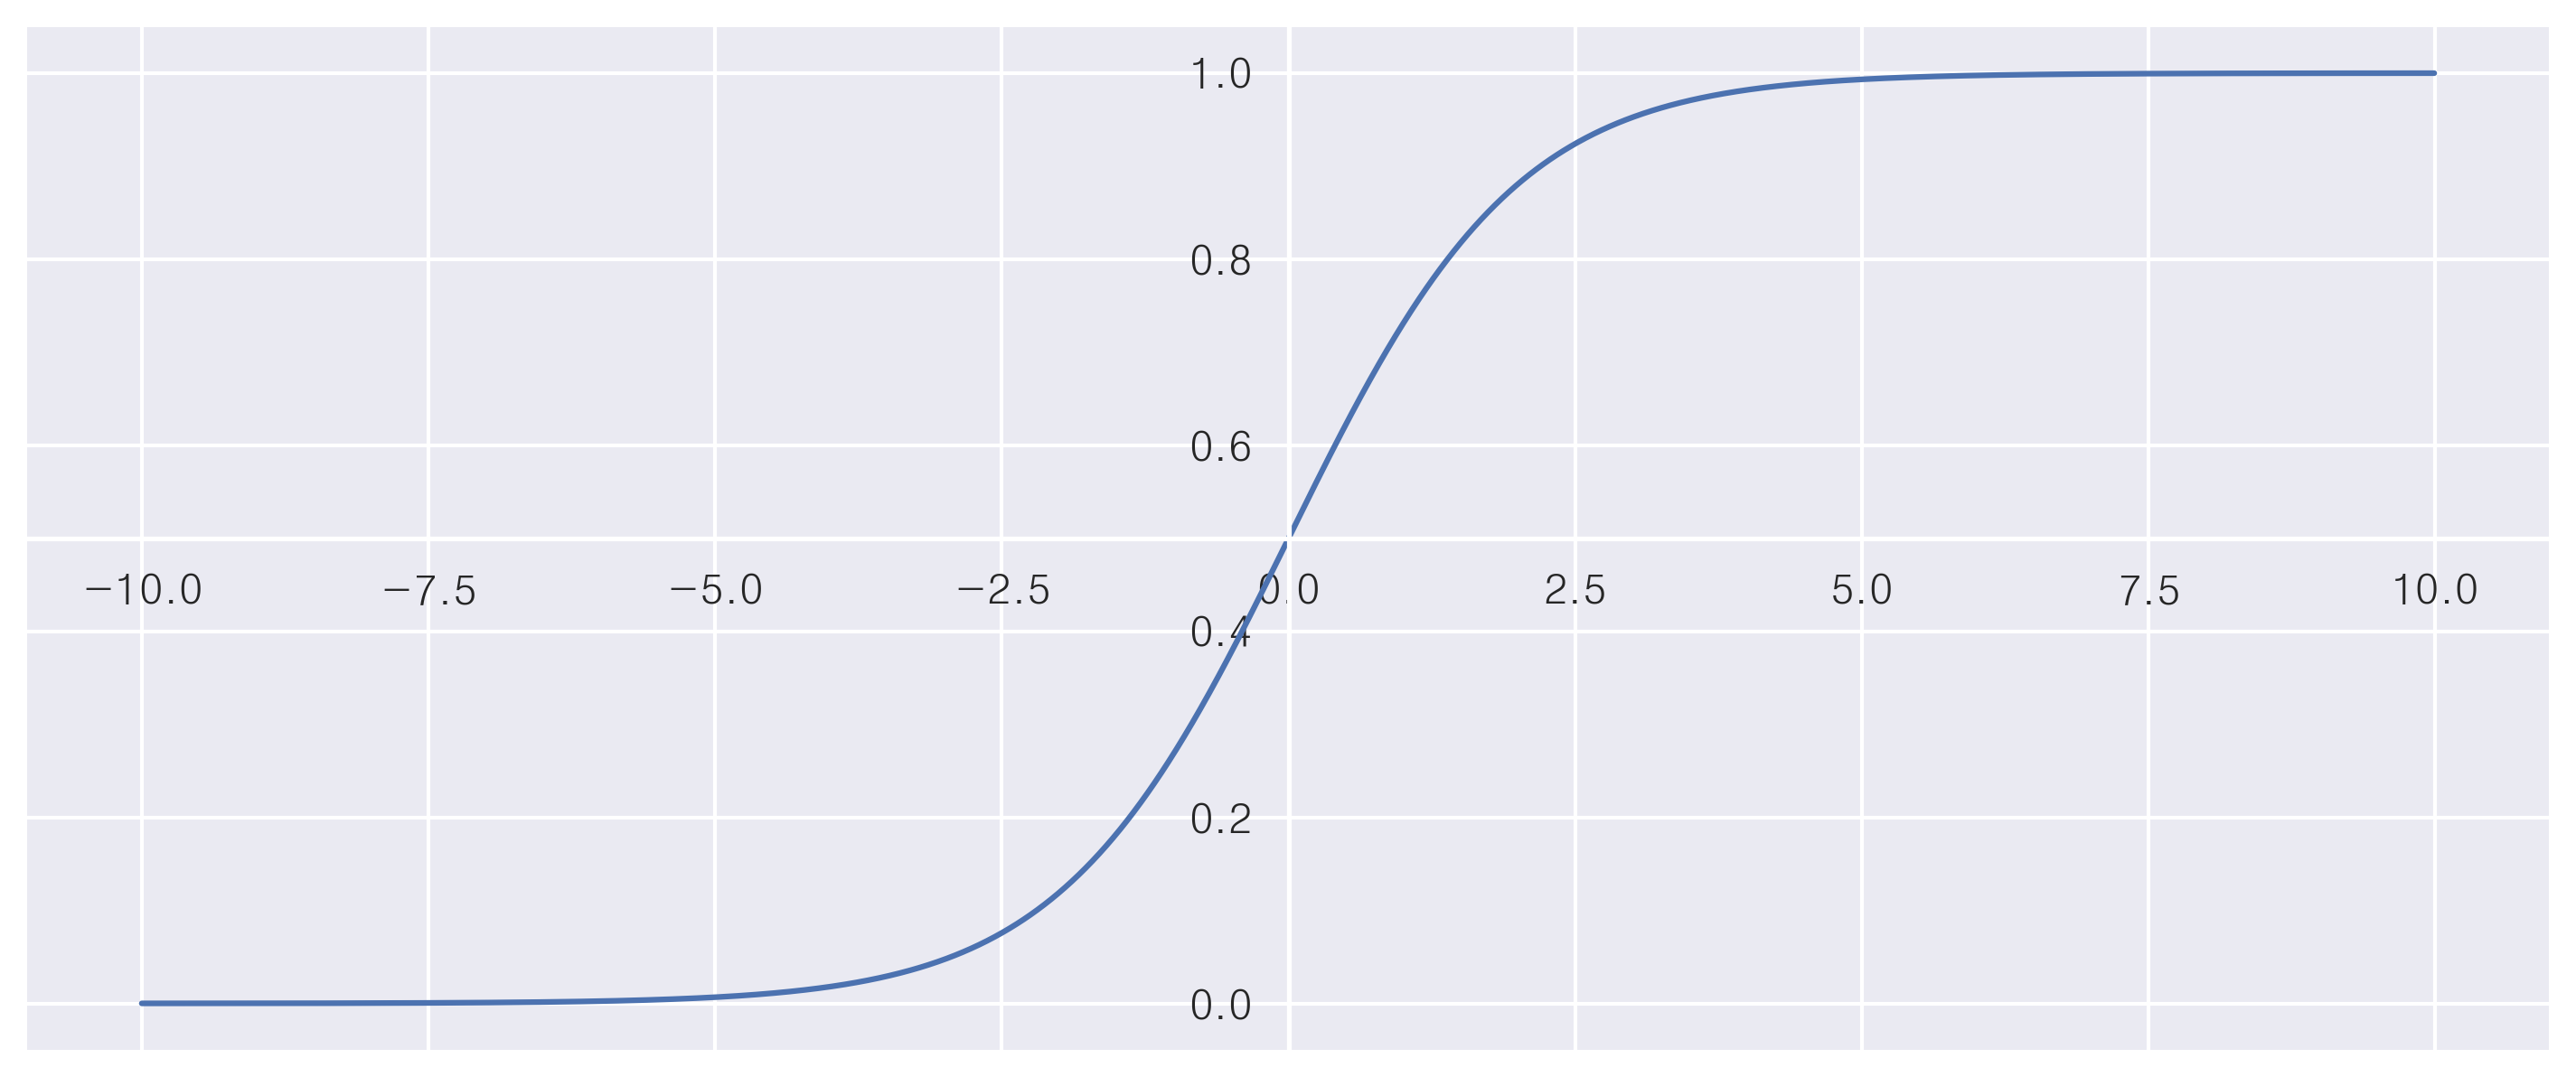

In [2]:
plt.figure(figsize=(12,5))
ax=plt.gca()
ax.plot(z,g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('center')
plt.show()

### logistic regression cost function

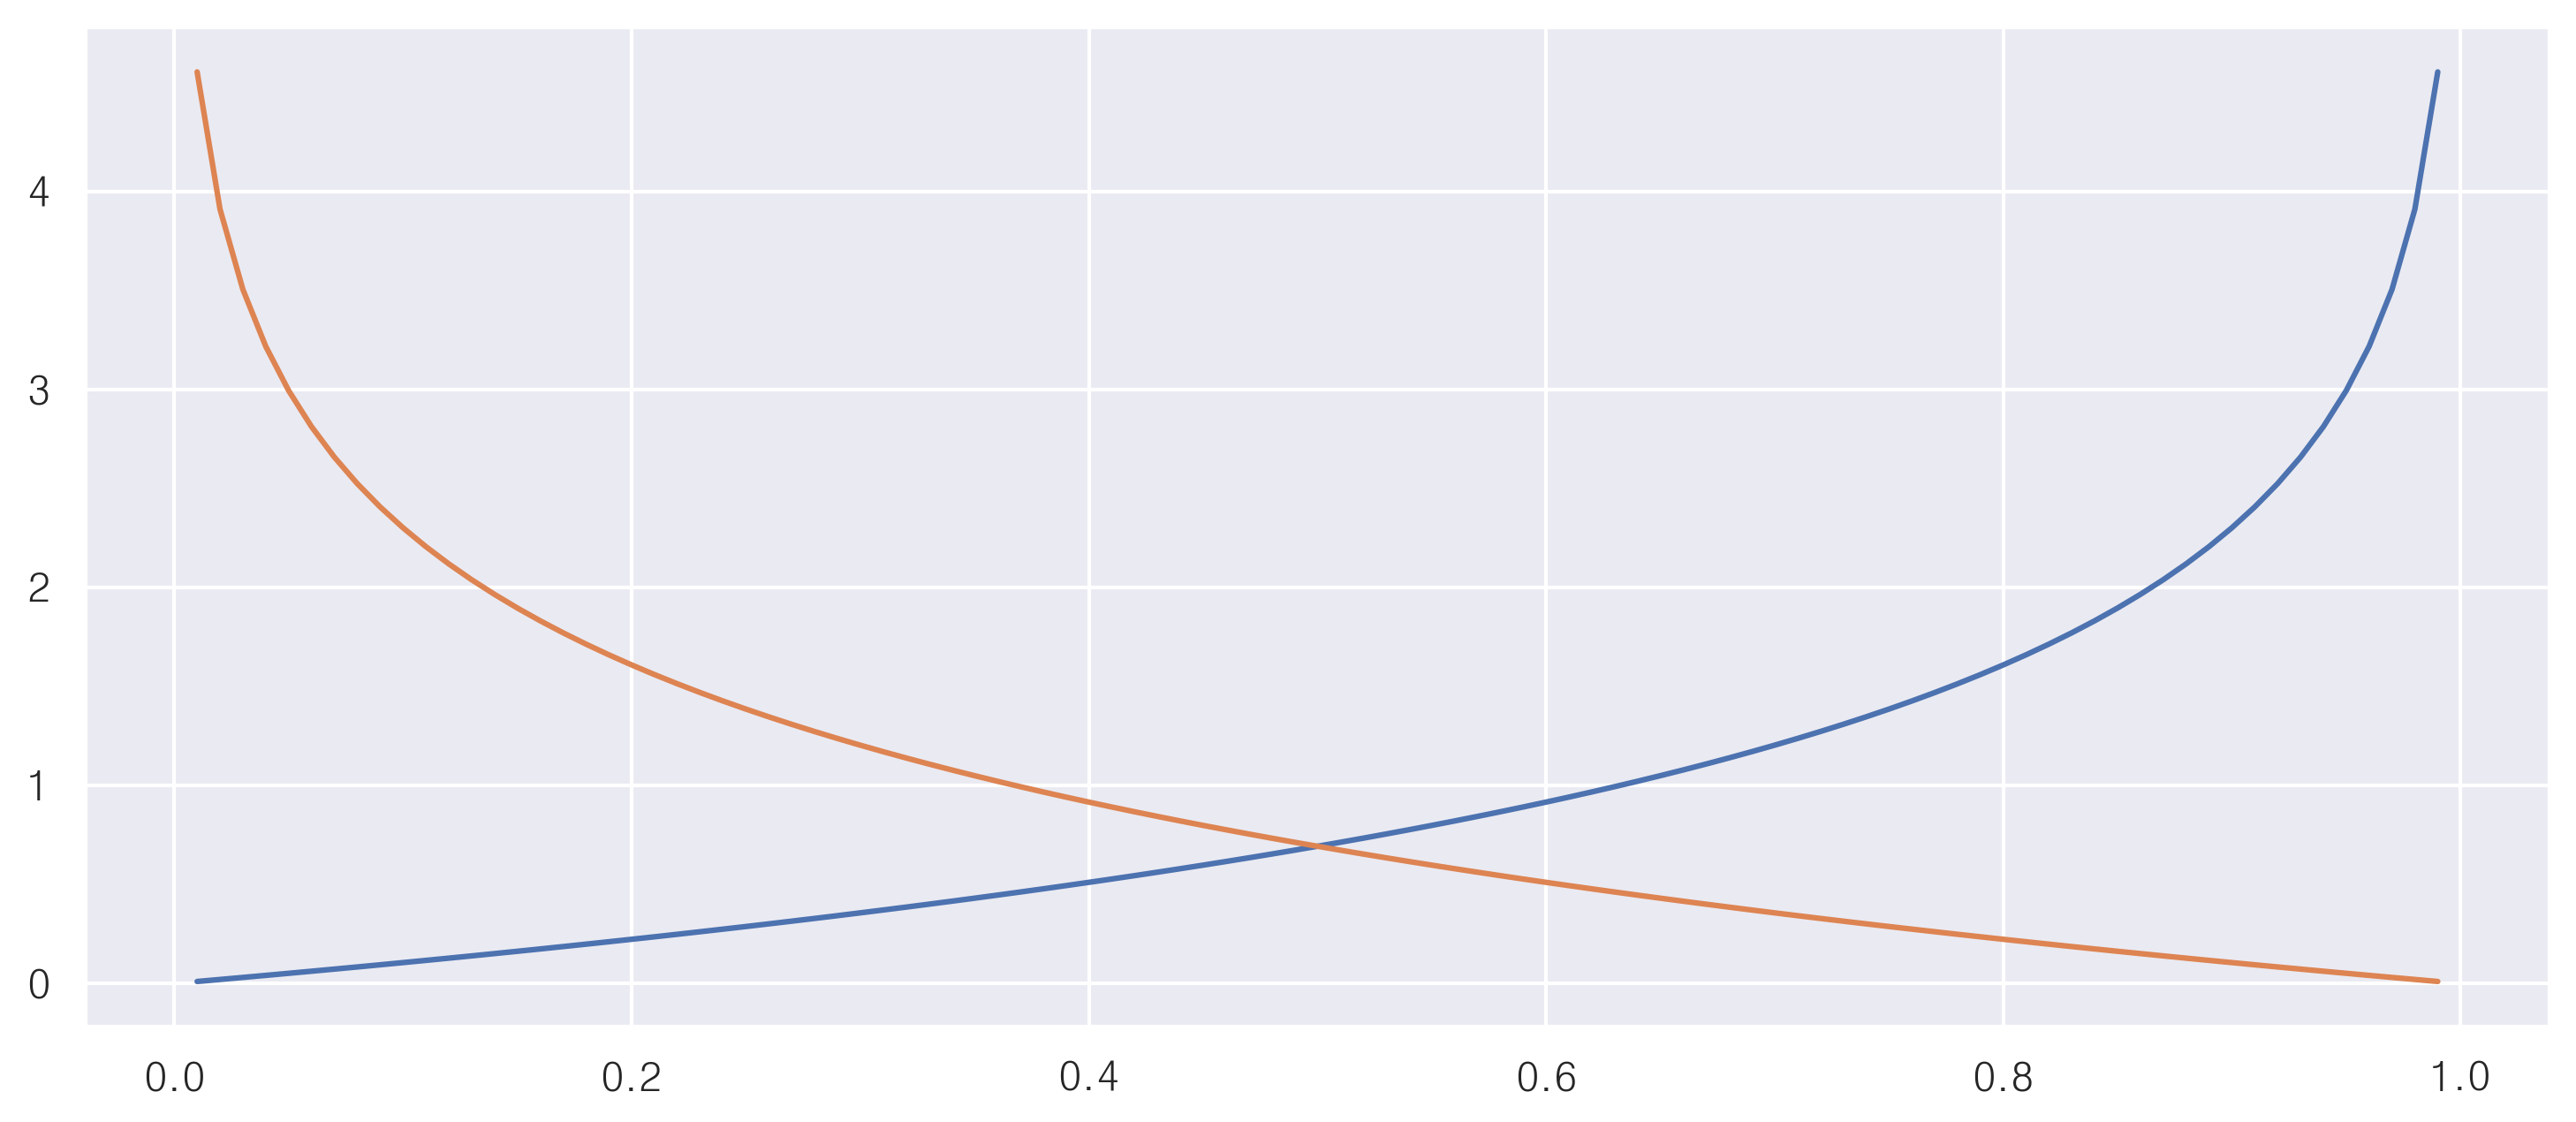

In [3]:
plt.figure(figsize=(12,5))
h=np.arange(0.01,1,0.01)
C0=-np.log(1-h)
C1=-np.log(h)
plt.plot(h,C0,label='y=0')
plt.plot(h,C1,label='y=1')

### wine 맛 분류 Logistic Regression 

In [4]:
#데이터 얻기
wine_url="https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"
wine=pd.read_csv(wine_url,index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
#X,y 데이터 셋 분리하기
wine['taste']=[1 if grade>5 else 0 for grade in wine['quality']]
X=wine.drop(['quality','taste'],axis=1)
y=wine['taste']

In [6]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=27)

In [7]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rl=LogisticRegression(solver='liblinear',random_state=27)
rl.fit(X_train,y_train)
pred_tr=rl.predict(X_train)
pred_test=rl.predict(X_test)
print('ACC : ',accuracy_score(pred_tr,y_train))
print('ACC : ',accuracy_score(pred_test,y_test))

ACC :  0.7452376370983259
ACC :  0.7276923076923076


In [8]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators=[
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=27))    
]
pipe=Pipeline(estimators)
pipe.fit(X_train,y_train)
pred_tr=pipe.predict(X_train)
pred_test=pipe.predict(X_test)
print('Acc :', accuracy_score(pred_tr,y_train))
print('Acc :', accuracy_score(pred_test,y_test))

Acc : 0.7461997306138156
Acc : 0.7276923076923076


In [9]:
#DecisionTree와의 비교
from sklearn.tree import DecisionTreeClassifier
wine_tree=DecisionTreeClassifier(max_depth=2,random_state=27)
wine_tree.fit(X_train,y_train)
models={'logistic regression':pipe,'decision tree':wine_tree }

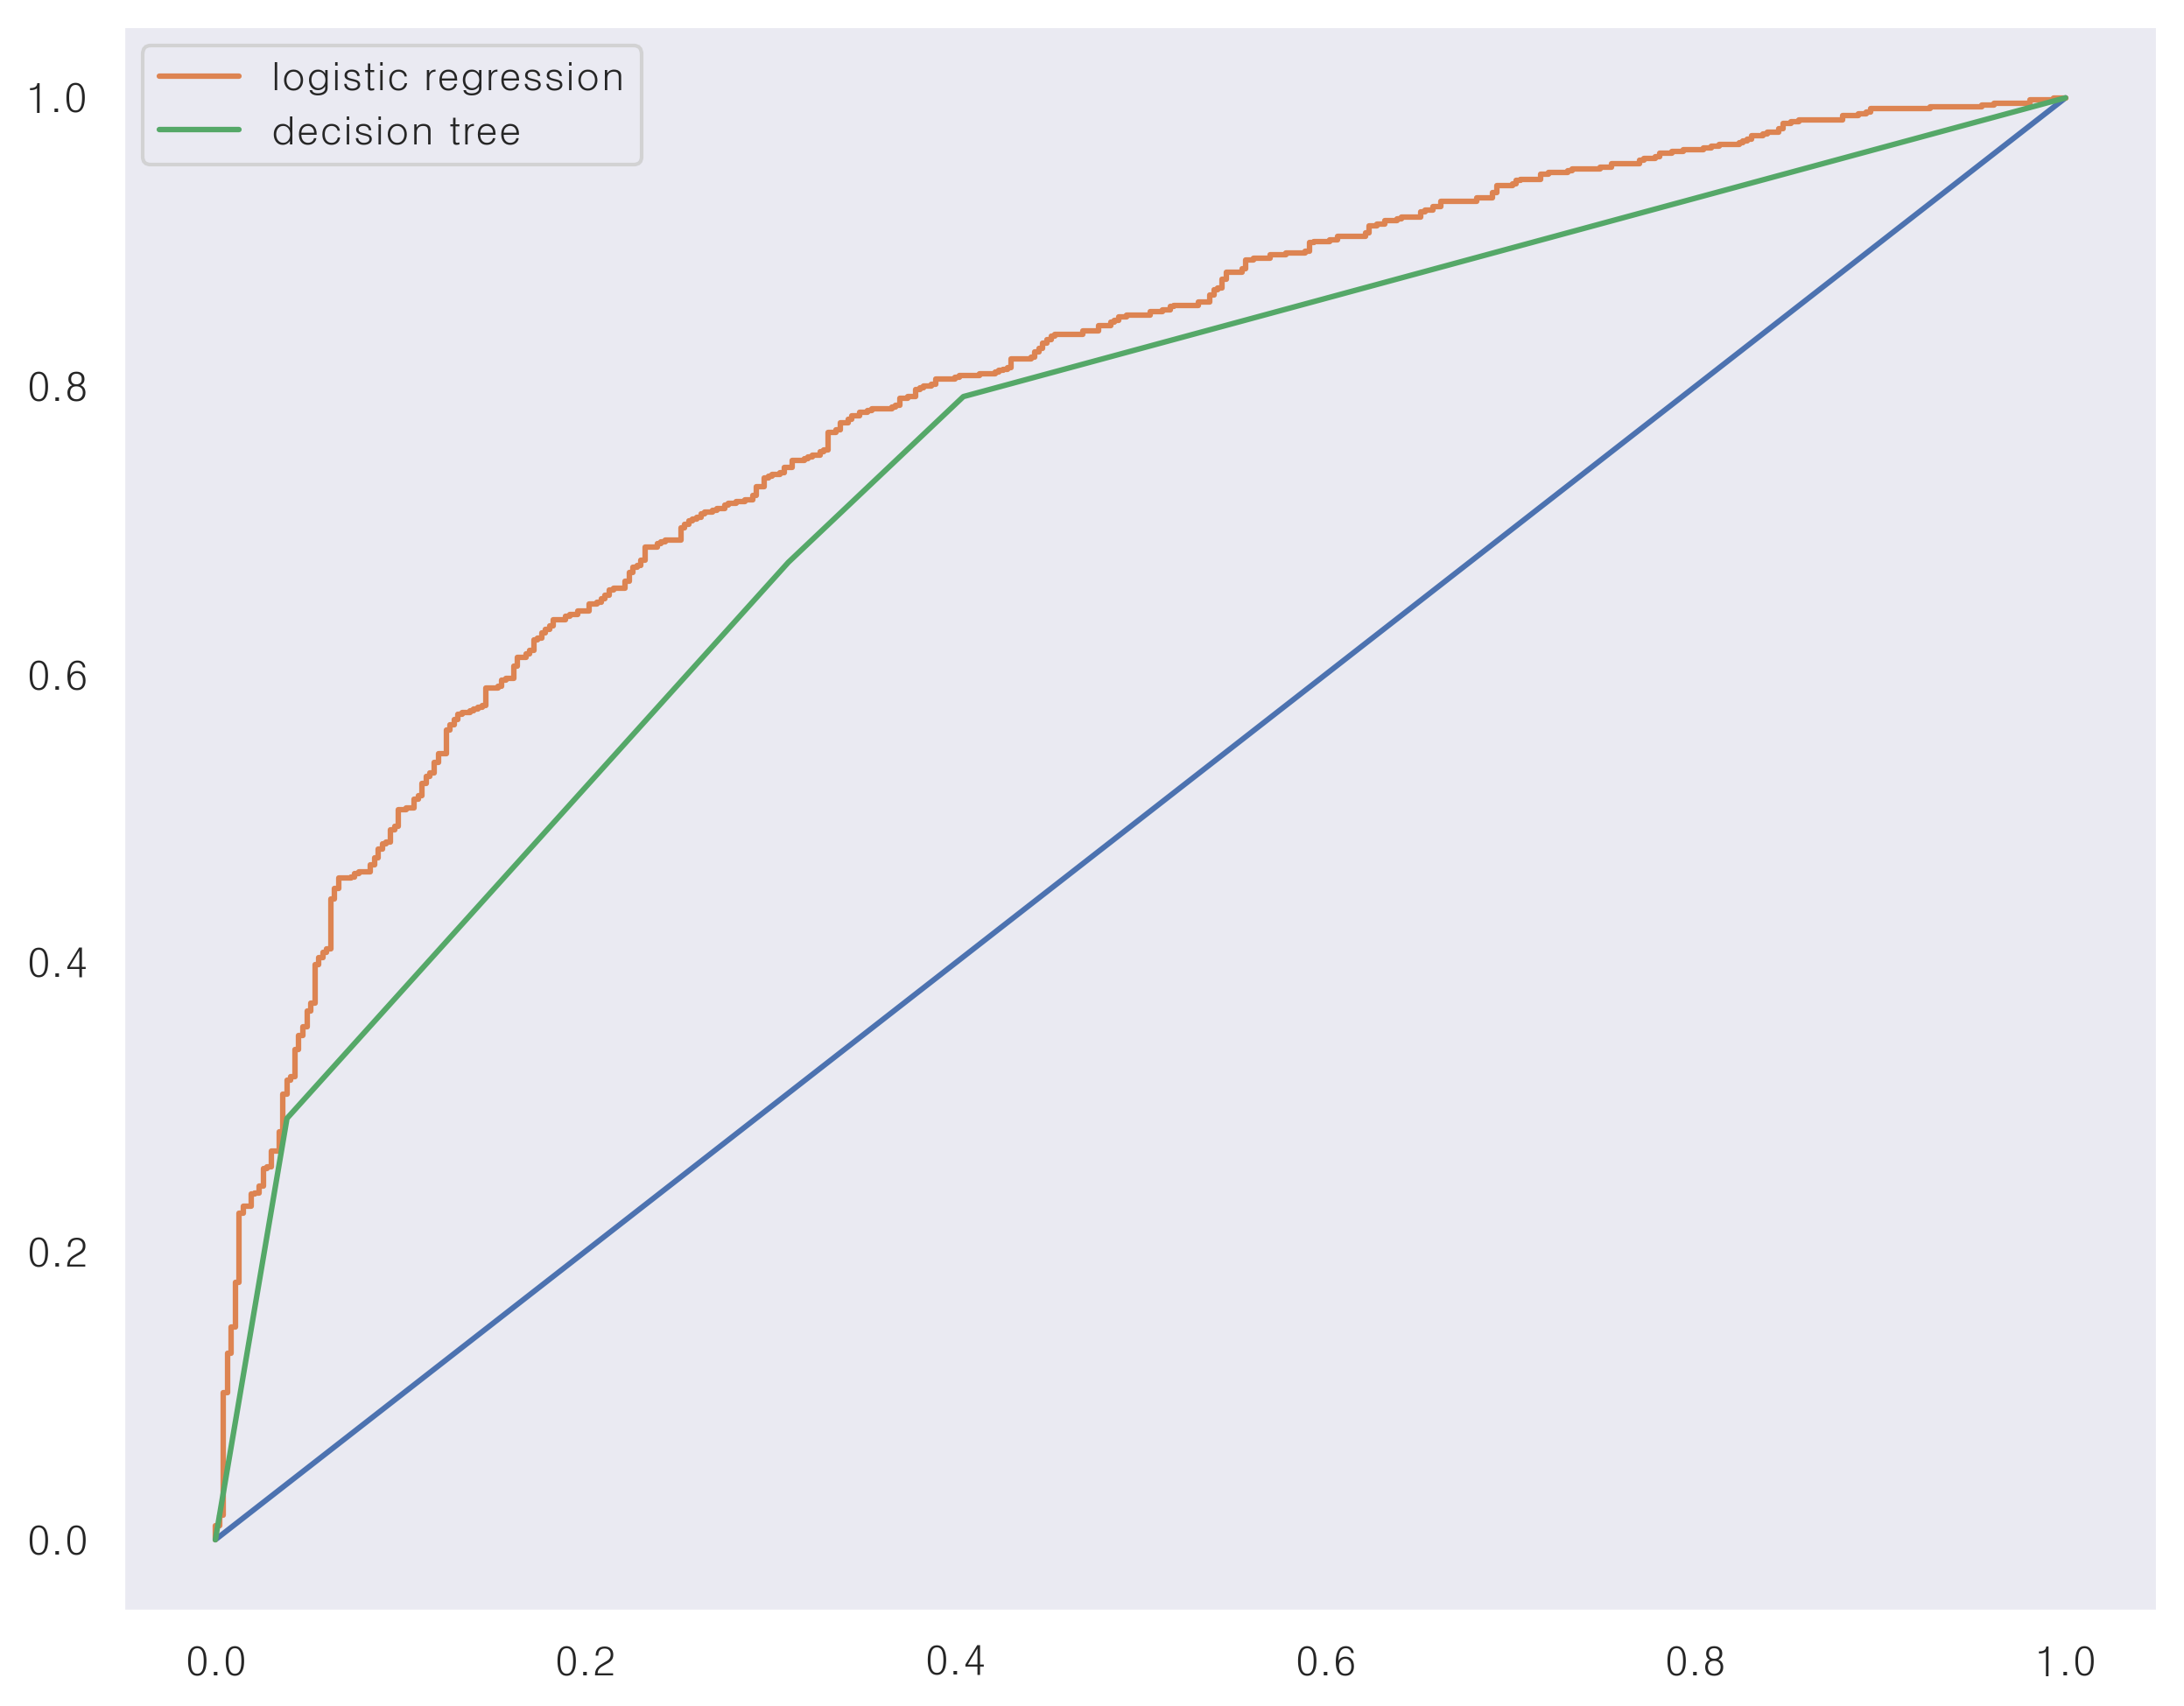

In [10]:
#roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,8))
plt.plot([0,1])
for model_name, model in models.items():
    pred=model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot(fpr,tpr,label=model_name)
    
plt.grid()
plt.legend()
plt.show()


### Pima 당뇨병 예측

In [11]:
PIMA_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
PIMA=pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#데이터 타입 확인 
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
PIMA=PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


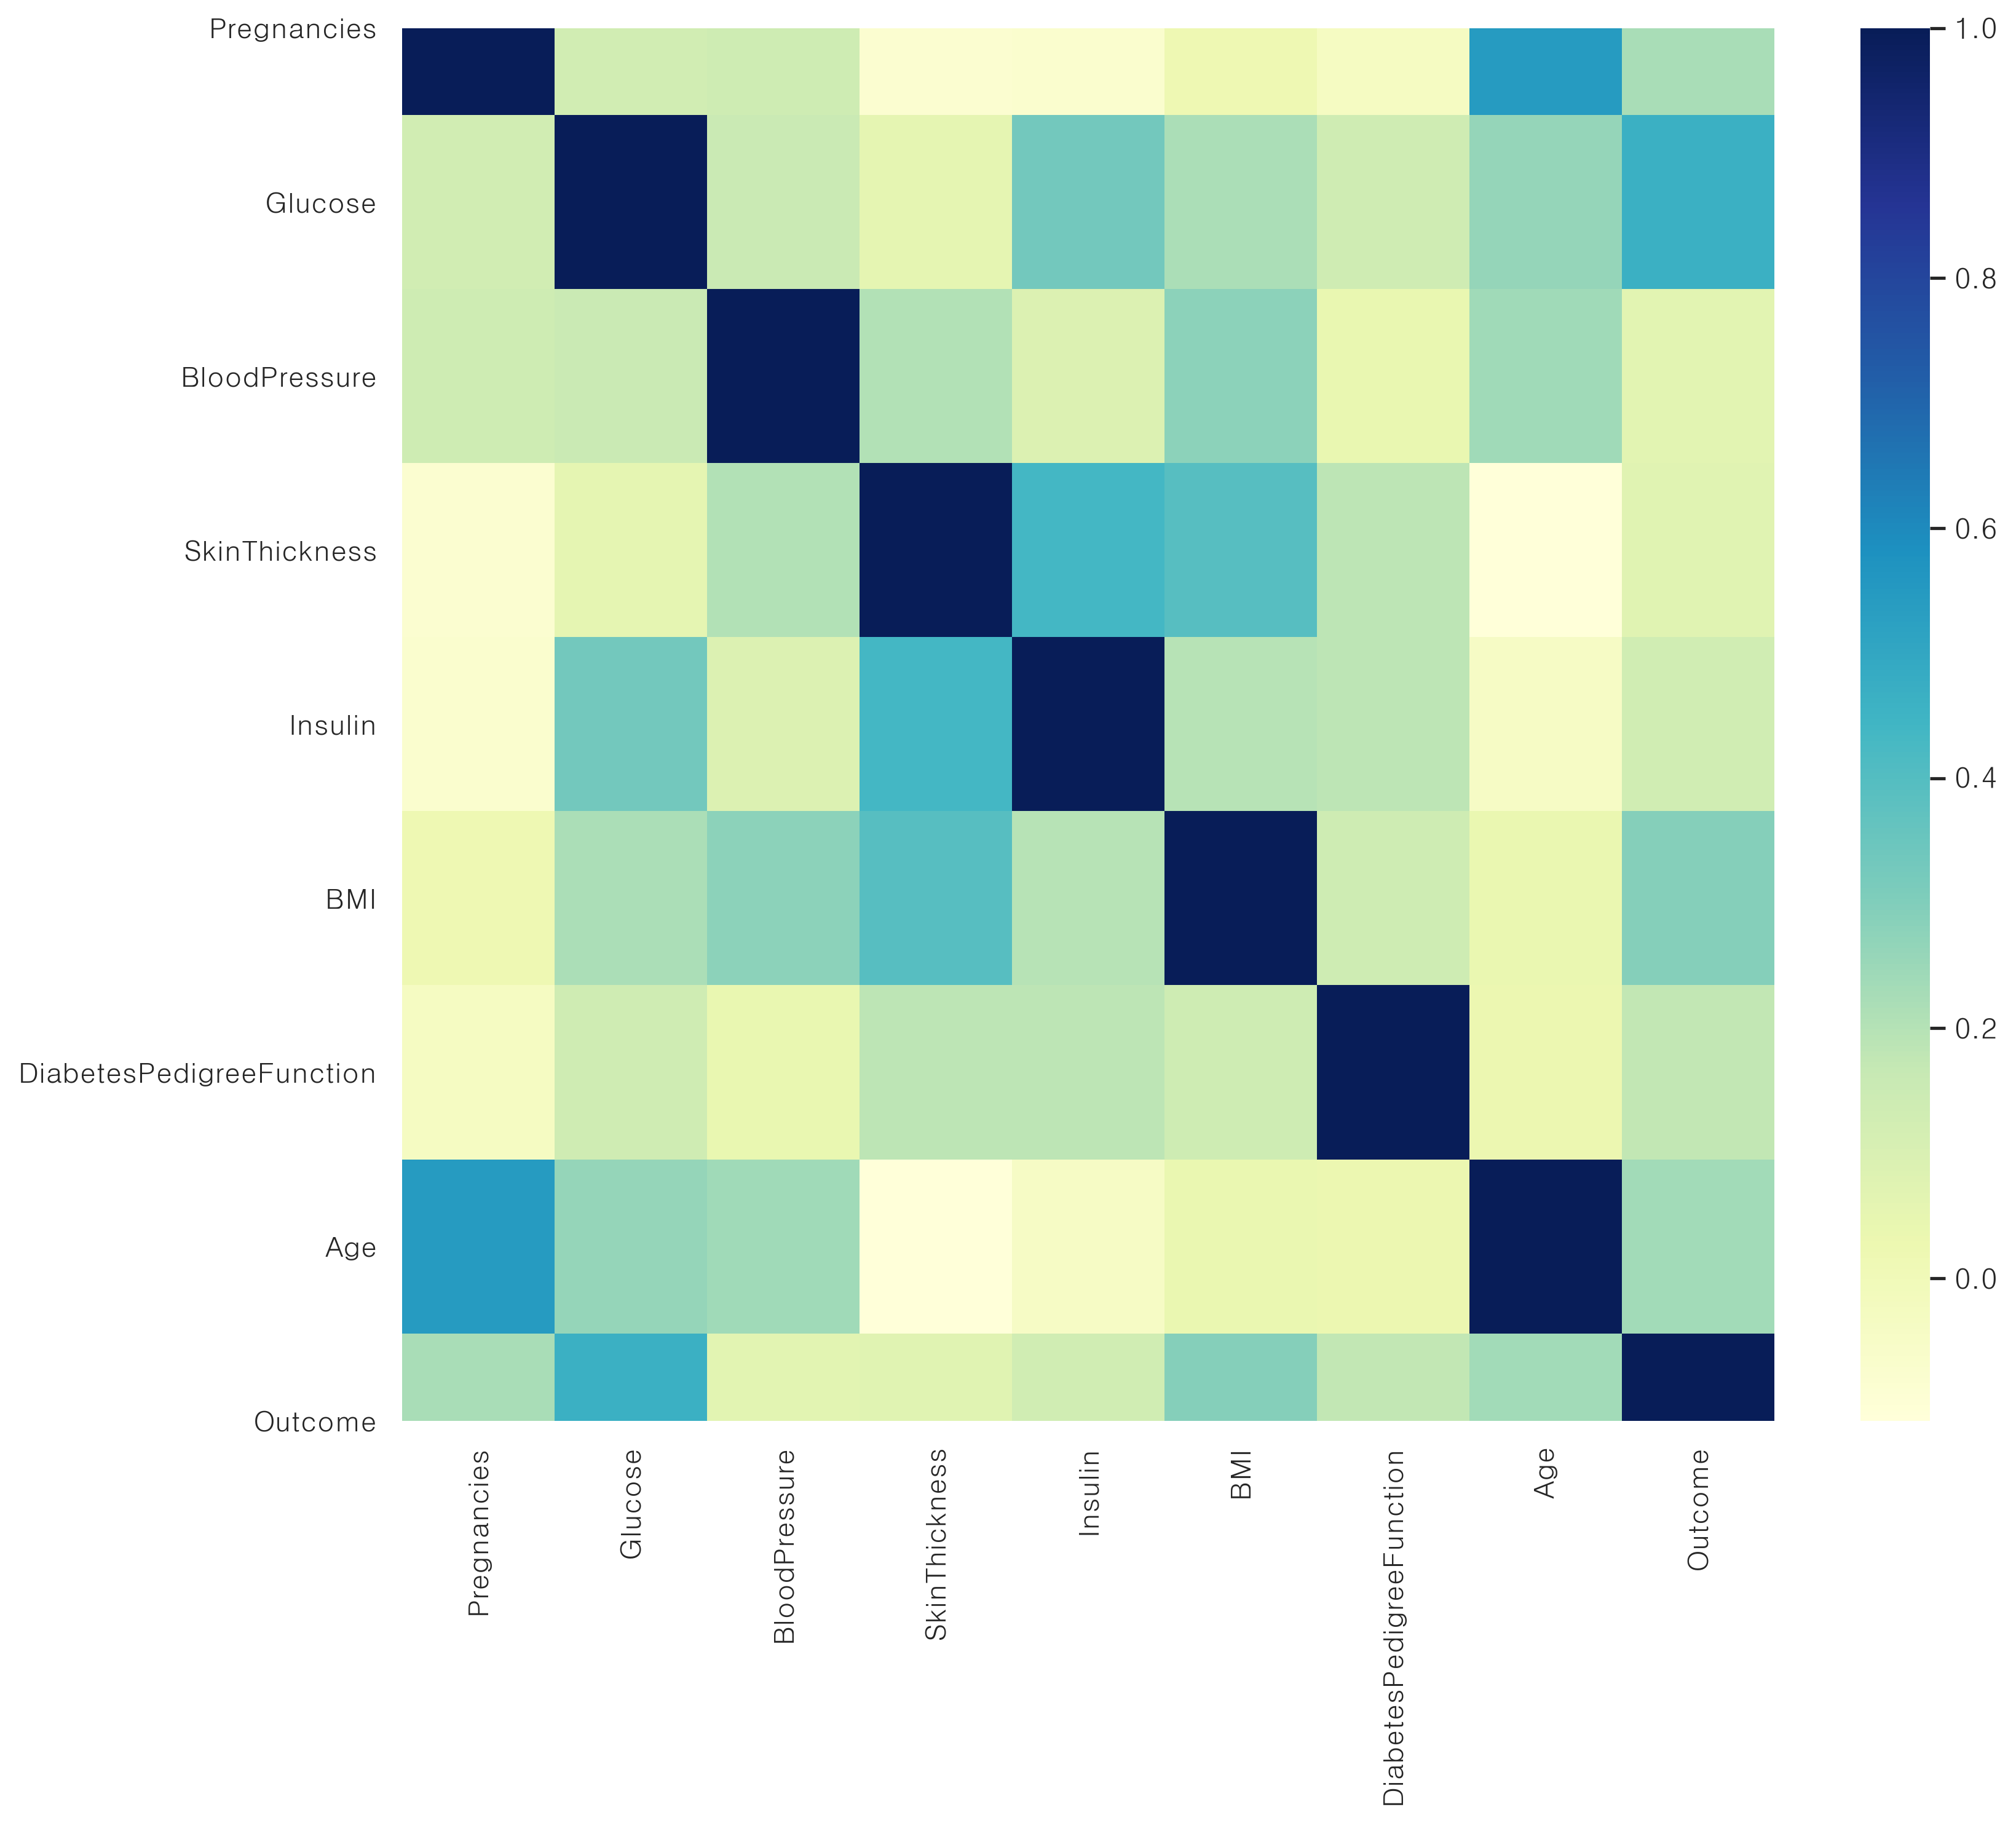

In [14]:
#상관계수 확인 
#Glucose,BMI 와 Outcome과의 상관계수가 높은 것 같다.
plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(),cmap='YlGnBu')

In [15]:
#각 컬럼의 0의 개수 확인
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
PIMA[PIMA['Glucose']==0]=PIMA['Glucose'].mean()

In [17]:
#0이 존재해서는 안되는 컬럼들의 결측치는 평균값으로 대체한다
zero_columns=['Glucose','BloodPressure','SkinThickness','BMI']
PIMA[zero_columns]=PIMA[zero_columns].replace(0,PIMA[zero_columns].mean())
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     370
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     497
dtype: int64

In [18]:
#train_test_split
X=PIMA.drop(['Outcome'],axis=1)
y=PIMA['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=27,test_size=0.2)

In [19]:
#Logistic Regression using pipeline
estimators=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=27, solver='liblinear'))
    
]
pipe=Pipeline(estimators)
pipe.fit(X_train,y_train)
pred=pipe.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
#accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score,recall_score,precision_score, roc_auc_score, f1_score

print('Accuracy_score : ',accuracy_score(pred,y_test))
print('Recall_score : ',recall_score(pred,y_test))
print('Precision_score : ',precision_score(pred,y_test))
print('Roc_auc_score : ',roc_auc_score(pred,y_test))
print('F1_score : ',f1_score(pred,y_test))

In [ ]:
#각 컬럼의 계수
coeff=list(pipe['clf'].coef_[0])
labels=list(X_train.columns)

In [ ]:
labels

In [ ]:
#중요한 feature 그림 그리기
features=pd.DataFrame({'features':labels, 'importance':coeff})
features.sort_values(by='importance',inplace=True)
features['positive']=features['importance']>0
features.set_index('features',inplace=True)
features['importance'].plot(kind='barh',figsize=(11,6),color=features['positive'].map({False : 'blue', True:'red'}))

결과 해석
1. Glucose, BMI는 당뇨병에 영향을 많이 준다.
2. 혈압(BloodPressure)은 당뇨병예측에 부정적인 영향을 준다. 
3. 연령(Age)가 Outcome과 더 높은 관련이 있는 것으로 보였으나, 실제 모델에서는 Glucose와 BMI의 영향이 더 크다.